In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [7]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


In [8]:
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, .05)  
baseline = 10
amplitude = 15
slope = 0.09
noise_level = 6

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

In [9]:
series

array([ 27.980286,  24.25819 ,  29.057243, ..., 149.7177  , 146.10208 ,
       155.56927 ], dtype=float32)

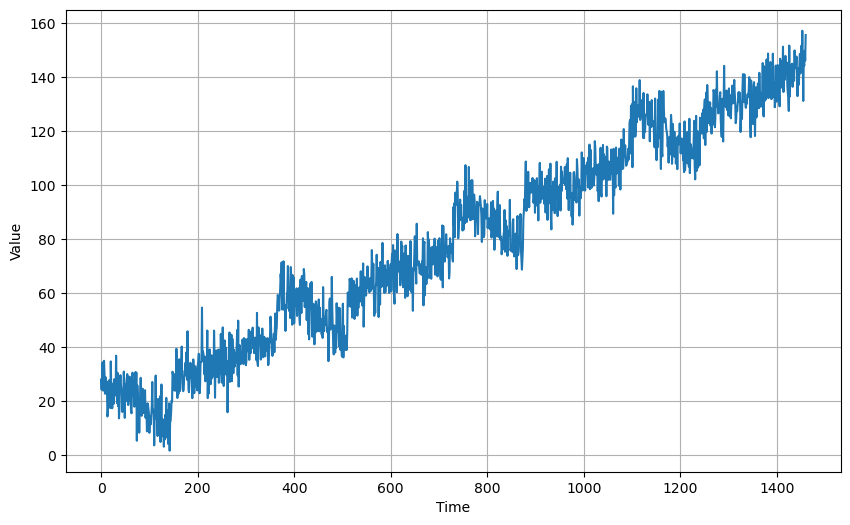

In [10]:
# native-forcast.ipynb
# トレンド・季節性・ノイズを持つ時系列の作成
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, .05)  
baseline = 10
amplitude = 15
slope = 0.09
noise_level = 6

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [11]:
time

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.458e+03, 1.459e+03,
       1.460e+03], dtype=float32)

In [12]:
series

array([ 27.980286,  24.25819 ,  29.057243, ..., 149.7177  , 146.10208 ,
       155.56927 ], dtype=float32)

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [16]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [17]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


2022-12-22 11:25:59.211231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

In [20]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=1)

Epoch 1/100


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


31/31 [==============================] - 2s 56ms/step - loss: 1056.9207
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 83.1698
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 65.1987
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 65.4422
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 63.2367
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 62.2807
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 61.6257
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 61.0857
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 60.5798
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 59.5469
Epoch 11/100
31/31 [==============================] - 0s 1ms/step - loss: 59.0405
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 59.7940
Epoch 13/100
31/31 [==============

In [21]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


In [22]:
forecast

[array([[22.106188]], dtype=float32),
 array([[25.266718]], dtype=float32),
 array([[25.004051]], dtype=float32),
 array([[22.370571]], dtype=float32),
 array([[23.898613]], dtype=float32),
 array([[24.17811]], dtype=float32),
 array([[24.61243]], dtype=float32),
 array([[23.668842]], dtype=float32),
 array([[23.20575]], dtype=float32),
 array([[23.524195]], dtype=float32),
 array([[24.478163]], dtype=float32),
 array([[25.114948]], dtype=float32),
 array([[24.973778]], dtype=float32),
 array([[23.746572]], dtype=float32),
 array([[24.72001]], dtype=float32),
 array([[25.796167]], dtype=float32),
 array([[26.707903]], dtype=float32),
 array([[24.54031]], dtype=float32),
 array([[24.168673]], dtype=float32),
 array([[22.963614]], dtype=float32),
 array([[24.20773]], dtype=float32),
 array([[25.26684]], dtype=float32),
 array([[22.227406]], dtype=float32),
 array([[25.453981]], dtype=float32),
 array([[24.982107]], dtype=float32),
 array([[24.408922]], dtype=float32),
 array([[24.331408]

In [23]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

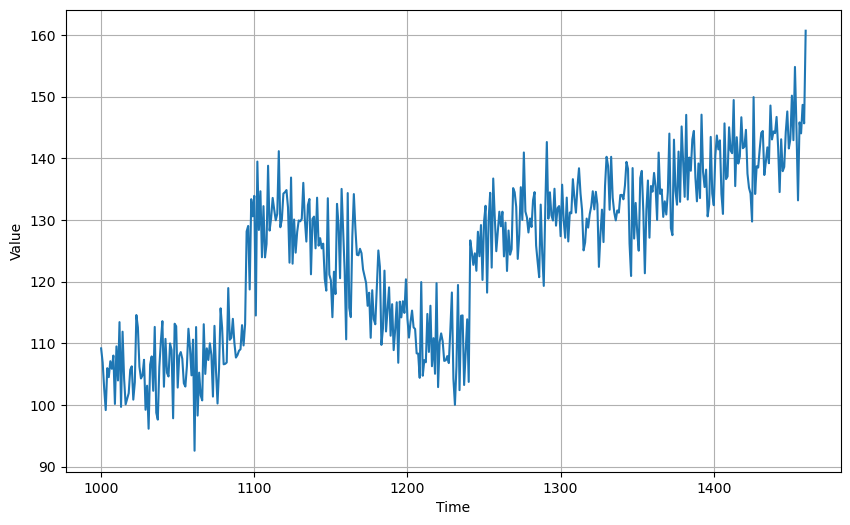

In [24]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)

In [25]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [26]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 18.3 MB/s eta 0:00:00


In [29]:
from keras_tuner.tuners import RandomSearch 

In [31]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

def build_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=10, max_value=30, step=2), activation='relu', input_shape=[window_size]))
  model.add(tf.keras.layers.Dense(10, activation='relu'))
  model.add(tf.keras.layers.Dense(1))

  model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(hp.Choice('momentum', values=[.9, .7, .5, .3]), lr=1e-5))
  return model

tuner = RandomSearch(build_model, objective='loss', max_trials=50, executions_per_trial=3, directory='my_dir', project_name='hello')

tuner.search_space_summary()

tuner.search(dataset, epochs=100, verbose=0)

INFO:tensorflow:Reloading Oracle from existing project my_dir/hello/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/hello/tuner0.json
Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 30, 'step': 2, 'sampling': None}
momentum (Choice)
{'default': 0.9, 'conditions': [], 'values': [0.9, 0.7, 0.5, 0.3], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
CPU times: user 24min 13s, sys: 3min 39s, total: 27min 52s
Wall time: 18min 4s
